In [22]:
##################################################################
####################### Code Zero Question Answer Generation #####


import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# quelques donnees pour test
data = [
    ("Quel est l'algorithme de tri le plus rapide ?", 
     ["Tri par insertion", "Tri fusion", "Tri rapide", "Tri à bulles"], 
     "Tri rapide"),
    ("Quelle est la complexité temporelle du tri fusion ?", 
     ["O(n log n)", "O(n^2)", "O(n)", "O(log n)"], 
     "O(n log n)")
]

# Prétraitement des données
questions = [question for question, _, _ in data]
answers = [answer for _, _, answer in data]

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(questions + answers)

vocab_size = len(tokenizer.word_index) + 1

# Création des séquences
input_sequences = []
for question, answer in zip(questions, answers):
    question_seq = tokenizer.texts_to_sequences([question])[0]
    for i in range(1, len(answer.split()) + 1):
        answer_seq = tokenizer.texts_to_sequences([answer.split()[:i]])
        if answer_seq and len(answer_seq[0]) > 0:  # Vérifiez si answer_seq n'est pas vide
            input_sequences.append((question_seq, answer_seq[0][-1]))
        else:
            print("Séquence de réponse vide pour:", answer.split()[:i])

# Conversion en tableau numpy
input_sequences = np.array(input_sequences)

# Séparation des données en x_train et y_train
x_train = input_sequences[:, 0]
y_train = input_sequences[:, 1]

# Préparation des données pour le modèle
max_seq_length = max(len(seq) for seq in x_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_seq_length, padding='pre')
y_train = tf.keras.utils.to_categorical(y_train, num_classes=vocab_size)

# Construction du modèle LSTM
embedding_dim = 128
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_seq_length),
    LSTM(256),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01))

# Entraînement du modèle
model.fit(x_train, y_train, batch_size=64, epochs=10)

# Fonction pour générer une question
def generate_question(model, tokenizer, max_seq_length):
    question = random.choice(questions)  # Sélectionne une question au hasard
    question_seq = tokenizer.texts_to_sequences([question])[0]
    question_seq = tf.keras.preprocessing.sequence.pad_sequences([question_seq], maxlen=max_seq_length, padding='pre')
    answer_seq = []
    for _ in range(max_seq_length):
        # Prédiction du mot suivant
        predicted_index = np.argmax(model.predict(question_seq), axis=-1)
        predicted_word = tokenizer.index_word[predicted_index[0]]
        answer_seq.append(predicted_word)
        if predicted_word in ['?', '.', '!']:
            break
        # Mise à jour de la séquence de question
        question_seq[0, :-1] = question_seq[0, 1:]
        question_seq[0, -1] = predicted_index
    return question, ' '.join(answer_seq)

# Génération de questions
for _ in range(2):
    question, answer = generate_question(model, tokenizer, max_seq_length)
    print("Question:", question)
    print("Réponse:", answer)
    print()


Séquence de réponse vide pour: ['O(n']


C:\Users\yvanol fotso\AppData\Local\Temp\ipykernel_41588\119009537.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_sequences = np.array(input_sequences)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.8869
Epoch 2/10
1/1 [==============================] - 0s 41ms/step - loss: 2.4656
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 1.0426
Epoch 4/10
1/1 [==============================] - 0s 38ms/step - loss: 2.3423
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 1.1016
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: 0.7891
Epoch 7/10
1/1 [==============================] - 0s 36ms/step - loss: 0.5727
Epoch 8/10
1/1 [==============================] - 0s 41ms/step - loss: 0.4473
Epoch 9/10
1/1 [==============================] - 0s 40ms/step - loss: 0.4047
Epoch 10/10
1/1 [==============================] - 0s 33ms/step
Question: Quel est l'algorithme de tri le plus rapide ?
Réponse: rapide rapide rapide rapide rapide rapide rapide rapide

1/1 [==============================] - 0s 25ms/step
Question: Quelle est la complexité temporelle du tri fusion ?


In [ ]:
##################################################################
####################### Code One Question Answer Generation #####

In [ ]:


import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

questions = [
    "Quelle est la formule de la loi d'Ohm ?",
    "Quel est le théorème fondamental du calcul ?",
    "Définissez la notion de dérivée d'une fonction.",
]

vectorizer = TfidfVectorizer(stop_words='english')
question_vectors = vectorizer.fit_transform(questions)

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics)
lda.fit(question_vectors)

def generate_equivalent_questions(question, num_questions):
    equivalent_questions = []

    question_vector = vectorizer.transform([question])
    
    question_topic_distribution = lda.transform(question_vector)

    for _ in range(num_questions):
        random_topic = np.random.choice(num_topics)
        random_question_vector = lda.components_[random_topic]
        indices = random_question_vector.argsort()[::-1][:len(vectorizer.get_feature_names_out())]
        random_question = np.array(vectorizer.get_feature_names_out())[indices]
        equivalent_questions.append(' '.join(random_question))
    
    return equivalent_questions

input_question = "Quelle est la formule de la loi d'Ohm ?"
num_equivalent_questions = 5

equivalent_questions = generate_equivalent_questions(input_question, num_equivalent_questions)

print("Question d'origine:", input_question)
print("Questions générées supposée etre equivalente:")
print("\n")

for question in equivalent_questions:
    print(question)

In [ ]:
##################################################################
####################### Code Two Question Answer Generation #####

In [1]:
########  j'utilise tous mon corpus pour entrainer mon model ######

import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Activation, Dense, LSTM

# Charger le texte complet
text = open('data1.txt', 'rb').read().decode(encoding='utf-8').lower()


## je rassurer que les borne inferieur et superieur mentionnee la sont dans la plage des donnees

#text = text[3000:8000] ### Extrait une partie de mon jeu de donne de l'index 'x' a 'y' pour le training [avantage plus rapide training ,facile a debuger , Inconv: Moins perfomant]

characters = sorted(set(text))
char_to_index = dict((c, i) for i, c in enumerate(characters))
index_to_char = dict((i, c) for i, c in enumerate(characters))

SEQ_LENGTH = 40
STEP_SIZE = 3

sentences = []
next_char = []

for i in range(0, len(text) - SEQ_LENGTH, STEP_SIZE):
    sentences.append(text[i: i + SEQ_LENGTH])
    next_char.append(text[i + SEQ_LENGTH])

x = np.zeros((len(sentences), SEQ_LENGTH, len(characters)), dtype=bool)
y = np.zeros((len(sentences), len(characters)), dtype=bool)

for i, satz in enumerate(sentences):
    for t, char in enumerate(satz):
        x[i, t, char_to_index[char]] = 1
    y[i, char_to_index[next_char[i]]] = 1

model = Sequential()
model.add(LSTM(512, input_shape=(SEQ_LENGTH, len(characters)), return_sequences=True))  # Retourne des séquences pour utiliser des LSTMs en pile
model.add(LSTM(256, return_sequences=True))  # Deuxième couche LSTM
model.add(LSTM(128))  # Troisième couche LSTM, cette fois sans retour de séquences
model.add(Dense(len(characters)))
model.add(Activation('softmax'))


# Activer l'exécution immédiate
tf.config.run_functions_eagerly(True)

# Compiler le modèle avec run_eagerly=True
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.01))

# Entraînement du modèle avec shuffle=False
model.fit(x, y, batch_size=256, epochs=20, shuffle=False)

# Désactiver l'exécution immédiate après l'entraînement
tf.config.run_functions_eagerly(False)

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def generate_text(length, temperature):
    start_index = random.randint(0, len(text) - SEQ_LENGTH - 1)
    generated = ''
    sentence = text[start_index: start_index + SEQ_LENGTH]
    generated += sentence
    for i in range(length):
        x_predictions = np.zeros((1, SEQ_LENGTH, len(characters)))
        for t, char in enumerate(sentence):
            x_predictions[0, t, char_to_index[char]] = 1

        predictions = model.predict(x_predictions, verbose=0)[0]
        next_index = sample(predictions, temperature)
        next_character = index_to_char[next_index]

        generated += next_character
        sentence = sentence[1:] + next_character
    return generated

print(generate_text(300, 0.2))
# print(generate_text(300, 0.4))
# print(generate_text(300, 0.5))
# print(generate_text(300, 0.6))
# print(generate_text(300, 0.7))
# print(generate_text(300, 0.8))


c:\python install\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
74/74 [==============================] - 321s 4s/step - loss: 3.2627
Epoch 2/20
74/74 [==============================] - 335s 5s/step - loss: 3.1922
Epoch 3/20
74/74 [==============================] - 298s 4s/step - loss: 3.1902
Epoch 4/20
74/74 [==============================] - 281s 4s/step - loss: 3.1876
Epoch 5/20
74/74 [==============================] - 313s 4s/step - loss: 3.1866
Epoch 6/20
74/74 [==============================] - 290s 4s/step - loss: 3.1848
Epoch 7/20
74/74 [==============================] - 275s 4s/step - loss: 3.1827
Epoch 8/20
74/74 [==============================] - 262s 4s/step - loss: 3.1818
Epoch 9/20
74/74 [==============================] - 275s 4s/step - loss: 3.1806
Epoch 10/20
74/74 [==============================] - 261s 4s/step - loss: 3.1792
Epoch 11/20
74/74 [==============================] - 259s 4s/step - loss: 3.1779
Epoch 12/20
74/74 [==============================] - 262s 4s/step - loss: 3.1783
Epoch 13/20
74/74 [==================

In [2]:
######## FIN CODE 2 ANALYSE GENERATION EN FONCTION DU DEGRE... ##########

print(generate_text(200, 0.2))
# print(generate_text(300, 0.5))
# print(generate_text(400, 0.6))
# print(generate_text(500, 0.7))
# print(generate_text(600, 0.8))

uel est l'algorithme de tri adapté aux l e    i o      e e            e      e  eeet a      r   e e  e            s  e     e   e e       e r       ee  a    e    e    u           re    o u  ere ree  i e                         e e           


In [ ]:
###################################################################
####################### Code Three Question Answer Generation #####

Quel est l'algorithme de tri le plus rapide ?    Tri rapide
Quelle est la complexité temporelle du tri fusion ?    O(n log n)
Quel est l'algorithme de recherche le plus efficace ?    Recherche binaire
Quelle est la complexité temporelle de la recherche binaire ?    O(log n)
Quel est l'algorithme de tri adapté aux listes presque triées ?    Tri par insertion
Quel est l'algorithme de tri adapté aux listes de petite taille ?    Tri par insertion
Quelle est la complexité temporelle de la recherche séquentielle ?    O(n)
Quelle est la complexité spatiale de l'algorithme de tri rapide ?    O(log n)
Quel est l'algorithme utilisé pour trouver le plus court chemin dans un graphe pondéré ?    Algorithme de Dijkstra
Quelle est la complexité temporelle de l'algorithme de recherche linéaire ?    O(n)
Quel est l'algorithme utilisé pour trouver un arbre couvrant minimal dans un graphe pondéré ?    Algorithme de Prim
Quelle est la complexité temporelle de l'algorithme de Kruskal ?    O(n log n)
Quel e

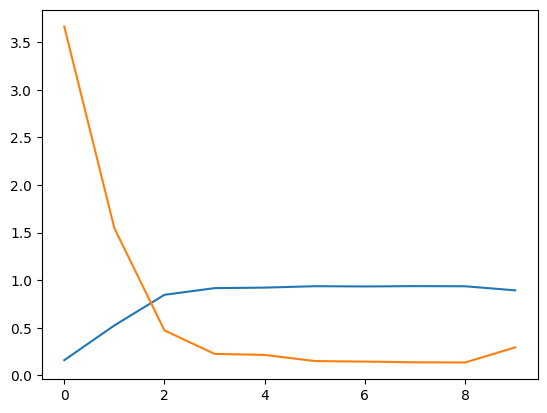

In [4]:
# -*- coding: utf-8 -*-
"""
# Question Reponse  Generation using LSTM

##Two types of Question Reponse generation


1.   Character based text generation
* Each character of the text is used to train the model and prediction will also result in generation of new characters. 

2.   Word based text generation
* Words are converted into tokens which are used to train the model. The model will generate words instead of characters in the prediction stage.

## Mechanics of the text generation model: 

1. The next word of the sequence is predicted using the words that are already present in the sequence. 

2. It is a simple model where splitting the data into training and testing sets is not required. This is because the model will use all the words in the sequence to predict the next word. Just like forecasting.

#The flow of program:

1. Loading data
2. Preprocessing the data and Tokenizing 
3. Building and fitting the model on data
4. Evaluate the model
5. Predicting(Generating the text)
6. Saving the model for future applicaitons
"""


import tensorflow as tf
import pandas as pd
import numpy as np


story_data = open('data2.txt', 'rb').read().decode(encoding='utf-8')

print(story_data)

# data cleaning process
import re    # Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

# cleaning the data
lower_data = story_data.lower() # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines() # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data)                         

final = ''  # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)

final_data = final.split('\n') # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Instantiating the Tokenizer
max_vocab = 10000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1  # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

"""## Creating n-gram sequences from the sentences

* Consider this sentence : ['two roads diverged in a yellow wood']. Here we will use ['two roads diverged in a yellow'] to predict ['wood']. This is the basic concept of forecasting which can be applied here to generate text.

* An advacement of this will be to use single word or every combination words possible from the sentence to predict the next word. And this is loosely termed as n_gram sequences

* The sentence ['Algorithme Instructions utilisées pour résoudre un problème'] will have sequence as [112, 113, 114, 7, 5, 190, 75]

* so we will use combinations of words to make our model better

* [112, 113], 
* [112, 113, 114], 
* [112, 113, 114, 7], 
* [112, 113, 114, 7, 5], 
* [112, 113, 114, 7, 5, 190], 
* [112, 113, 114, 7, 5, 190, 75]

* we train our model that if 112 comes then it has to predict 113.
* if combination of 112, 113, comes then it has to predict 114 and so on.
"""

# We will turn the sentences to sequences line by line and create n_gram sequences

input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

# Taking xs and labels to train the model.

xs = input_seq[:, :-1]    # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1] # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# using the functional APIs of keras to define the model

i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

# using the pipeline method of sequential to define a model

# model = Sequential()
# model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
# model.add(Dropout(0.2))
# model.add(LSTM(520, return_sequences=True))
# model.add(Bidirectional(LSTM(340, return_sequences=True)))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(vocab_size, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()    # We can know about the shape of the model

# r = model.fit(xs,ys,epochs=100)

r = model.fit(xs,ys,epochs=10)



# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['loss']) #new


# Defining a function to take input of seed text from user and no. of words to be predicted

def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

# predicting or generating the question reponse with the seed text

seed_text = 'Quel est l\'algorithme de tri le plus rapide ?'
next_words = 20

predict_words(seed_text, next_words)

# saving the model

model.save('generative_question.h5') # Will create a HDF5 file of the model

In [6]:
################## j'automatise la generation ############

import random

# Choix aléatoire d'une phrase de départ
seed_text = random.choice(story_data)

# Prétraitement des données
def clean_text_v2(text):
    text = re.sub(r'[^\w\s]', ' ', text)  # Remplacer la ponctuation par des espaces
    return text.strip()

# Prétraitement de la phrase de départ
seed_text = clean_text_v2(seed_text)

# Génération des mots suivants
next_words = 20
predict_words(seed_text, next_words)

print("\n")


######## je peux donnee un taille max pour la longueur de la sequence (text d'entree)

# Définir une limite de longueur de phrase
max_phrase_length = 100

# Choix aléatoire d'une phrase de départ
seed_text_2 = random.choice([phrase for phrase in story_data if len(phrase.split()) < max_phrase_length])

next_words = 20
predict_words(seed_text_2, next_words)

1/1 [==============================] - 0s 63ms/step
a devient la chaîne de caractères jjjjjjjjkkkkll si on la compresse par lalgorithme rle 8j4k2l 8j4k2l 8j4k2l par un volume final


1/1 [==============================] - 0s 57ms/step
  devient la chaîne de caractères jjjjjjjjkkkkll si on la compresse par lalgorithme rle 8j4k2l 8j4k2l 8j4k2l par un volume final


In [ ]:
################## Four Generation #####################################
########################################################################

In [7]:
################### FINAL THREE  ###################

import tensorflow as tf
import numpy as np

assert hasattr(tf, "function")

In [8]:
with open("data1.txt", "r") as f:
    text = f.read()

print(len(text))

print(text[:1000])

56223
Quel est l'algorithme de tri le plus rapide ? :
Tri rapide

Quelle est la complexitÃ© temporelle du tri fusion ? :
O(n log n)

Quel est l'algorithme de recherche le plus efficace ? :
Recherche binaire

Quelle est la complexitÃ© temporelle de la recherche binaire ? :
O(log n)

Quel est l'algorithme de tri adaptÃ© aux listes presque triÃ©es ? :
Tri par insertion

Quel est l'algorithme de tri adaptÃ© aux listes de petite taille ? :
Tri par insertion

Quelle est la complexitÃ© temporelle de la recherche sÃ©quentielle ? :
O(n)

Quelle est la complexitÃ© spatiale de l'algorithme de tri rapide ? :
O(log n)

Quel est l'algorithme utilisÃ© pour trouver le plus court chemin dans un graphe pondÃ©rÃ© ? :
Algorithme de Dijkstra

Quelle est la complexitÃ© temporelle de l'algorithme de recherche linÃ©aire ? :
O(n)

Quel est l'algorithme utilisÃ© pour trouver un arbre couvrant minimal dans un graphe pondÃ©rÃ© ? :
Algorithme de Prim

Quelle est la complexitÃ© temporelle de l'algorithme de Kruskal

In [9]:
######## Remove character and create vocab

import unidecode

text = unidecode.unidecode(text)
text = text.lower()

text = text.replace("2", "")
text = text.replace("1", "")
text = text.replace("8", "")
text = text.replace("5", "")
text = text.replace(">", "")
text = text.replace("<", "")
text = text.replace("!", "")
text = text.replace("?", "")
text = text.replace("-", "")
text = text.replace("$", "")

text = text.strip()

vocab = set(text)
print(len(vocab), vocab)

print(text[:1000])


41 {',', 'w', 'e', 'o', 'y', '"', 'b', '4', 'r', 'c', 'l', '_', '3', 'n', 'j', 'g', ' ', 'p', '/', 't', 's', 'q', "'", '(', '.', 'm', 'u', 'i', 'a', ')', 'v', 'k', '\n', '^', ':', 'x', 'f', 'h', 'd', '0', '9'}
quel est l'algorithme de tri le plus rapide  :
tri rapide

quelle est la complexita(c) temporelle du tri fusion  :
o(n log n)

quel est l'algorithme de recherche le plus efficace  :
recherche binaire

quelle est la complexita(c) temporelle de la recherche binaire  :
o(log n)

quel est l'algorithme de tri adapta(c) aux listes presque tria(c)es  :
tri par insertion

quel est l'algorithme de tri adapta(c) aux listes de petite taille  :
tri par insertion

quelle est la complexita(c) temporelle de la recherche sa(c)quentielle  :
o(n)

quelle est la complexita(c) spatiale de l'algorithme de tri rapide  :
o(log n)

quel est l'algorithme utilisa(c) pour trouver le plus court chemin dans un graphe ponda(c)ra(c)  :
algorithme de dijkstra

quelle est la complexita(c) temporelle de l'algorit

In [10]:
## Map each letter to int #####

vocab_size = len(vocab)

vocab_to_int = {l:i for i,l in enumerate(vocab)}
int_to_vocab = {i:l for i,l in enumerate(vocab)}

print("vocab_to_int", vocab_to_int)
print()
print("int_to_vocab", int_to_vocab)

print("\nint for e:", vocab_to_int["e"])
int_for_e = vocab_to_int["e"]
print("letter for %s: %s" % (vocab_to_int["e"], int_to_vocab[int_for_e]))

vocab_to_int {',': 0, 'w': 1, 'e': 2, 'o': 3, 'y': 4, '"': 5, 'b': 6, '4': 7, 'r': 8, 'c': 9, 'l': 10, '_': 11, '3': 12, 'n': 13, 'j': 14, 'g': 15, ' ': 16, 'p': 17, '/': 18, 't': 19, 's': 20, 'q': 21, "'": 22, '(': 23, '.': 24, 'm': 25, 'u': 26, 'i': 27, 'a': 28, ')': 29, 'v': 30, 'k': 31, '\n': 32, '^': 33, ':': 34, 'x': 35, 'f': 36, 'h': 37, 'd': 38, '0': 39, '9': 40}

int_to_vocab {0: ',', 1: 'w', 2: 'e', 3: 'o', 4: 'y', 5: '"', 6: 'b', 7: '4', 8: 'r', 9: 'c', 10: 'l', 11: '_', 12: '3', 13: 'n', 14: 'j', 15: 'g', 16: ' ', 17: 'p', 18: '/', 19: 't', 20: 's', 21: 'q', 22: "'", 23: '(', 24: '.', 25: 'm', 26: 'u', 27: 'i', 28: 'a', 29: ')', 30: 'v', 31: 'k', 32: '\n', 33: '^', 34: ':', 35: 'x', 36: 'f', 37: 'h', 38: 'd', 39: '0', 40: '9'}

int for e: 2
letter for 2: e


In [11]:
encoded = [vocab_to_int[l] for l in text]
encoded_sentence = encoded[:100]

print(encoded_sentence)

[21, 26, 2, 10, 16, 2, 20, 19, 16, 10, 22, 28, 10, 15, 3, 8, 27, 19, 37, 25, 2, 16, 38, 2, 16, 19, 8, 27, 16, 10, 2, 16, 17, 10, 26, 20, 16, 8, 28, 17, 27, 38, 2, 16, 16, 34, 32, 19, 8, 27, 16, 8, 28, 17, 27, 38, 2, 32, 32, 21, 26, 2, 10, 10, 2, 16, 2, 20, 19, 16, 10, 28, 16, 9, 3, 25, 17, 10, 2, 35, 27, 19, 28, 23, 9, 29, 16, 19, 2, 25, 17, 3, 8, 2, 10, 10, 2, 16, 38, 26]


In [12]:
decoded_sentence = [int_to_vocab[i] for i in encoded_sentence]
print(decoded_sentence)

['q', 'u', 'e', 'l', ' ', 'e', 's', 't', ' ', 'l', "'", 'a', 'l', 'g', 'o', 'r', 'i', 't', 'h', 'm', 'e', ' ', 'd', 'e', ' ', 't', 'r', 'i', ' ', 'l', 'e', ' ', 'p', 'l', 'u', 's', ' ', 'r', 'a', 'p', 'i', 'd', 'e', ' ', ' ', ':', '\n', 't', 'r', 'i', ' ', 'r', 'a', 'p', 'i', 'd', 'e', '\n', '\n', 'q', 'u', 'e', 'l', 'l', 'e', ' ', 'e', 's', 't', ' ', 'l', 'a', ' ', 'c', 'o', 'm', 'p', 'l', 'e', 'x', 'i', 't', 'a', '(', 'c', ')', ' ', 't', 'e', 'm', 'p', 'o', 'r', 'e', 'l', 'l', 'e', ' ', 'd', 'u']


In [13]:
decoded_sentence = "".join(decoded_sentence)
print(decoded_sentence)

quel est l'algorithme de tri le plus rapide  :
tri rapide

quelle est la complexita(c) temporelle du


In [14]:
inputs, targets = encoded, encoded[1:]

print("Inputs", inputs[:10])
print("Targets", targets[:10])

Inputs [21, 26, 2, 10, 16, 2, 20, 19, 16, 10]
Targets [26, 2, 10, 16, 2, 20, 19, 16, 10, 22]


In [24]:
def gen_batch(inputs, targets, seq_len, batch_size, noise=0):
    # Size of each chunk
    chuck_size = (len(inputs) -1)  // batch_size
    # Numbef of sequence per chunk
    sequences_per_chunk = chuck_size // seq_len

    for s in range(0, sequences_per_chunk):
        batch_inputs = np.zeros((batch_size, seq_len))
        batch_targets = np.zeros((batch_size, seq_len))
        for b in range(0, batch_size):
            fr = (b*chuck_size)+(s*seq_len)
            to = fr+seq_len
            batch_inputs[b] = inputs[fr:to]
            batch_targets[b] = inputs[fr+1:to+1]
            
            if noise > 0:
                noise_indices = np.random.choice(seq_len, noise)
                batch_inputs[b][noise_indices] = np.random.randint(0, vocab_size)
            
        yield batch_inputs, batch_targets

for batch_inputs, batch_targets in gen_batch(inputs, targets, 5, 32, noise=0):
    print(batch_inputs[0], batch_targets[0])
    break

for batch_inputs, batch_targets in gen_batch(inputs, targets, 5, 32, noise=3):
    print(batch_inputs[0], batch_targets[0])
    break

[21. 26.  2. 10. 16.] [26.  2. 10. 16.  2.]
[21. 26.  2. 34. 34.] [26.  2. 10. 16.  2.]


In [25]:
############ create your own layer ###########

class OneHot(tf.keras.layers.Layer):
    def __init__(self, depth, **kwargs):
        super(OneHot, self).__init__(**kwargs)
        self.depth = depth

    def call(self, x, mask=None):
        return tf.one_hot(tf.cast(x, tf.int32), self.depth)

In [26]:
################## Test if the layer work well ###################

class RnnModel(tf.keras.Model):

    def __init__(self, vocab_size):
        super(RnnModel, self).__init__()
        # Convolutions
        self.one_hot = OneHot(len(vocab))

    def call(self, inputs):
        output = self.one_hot(inputs)
        return output

batch_inputs, batch_targets = next(gen_batch(inputs, targets, 50, 32))

print(batch_inputs.shape)

model = RnnModel(len(vocab))
output = model.predict(batch_inputs)

print(output.shape)

#print(output)

print("Input letter is:", batch_inputs[0][0])
print("One hot representation of the letter", output[0][0])

#assert(output[int(batch_inputs[0][0])]==1)


#assert(output[int(batch_inputs[0][0])]==1)


(32, 50)
1/1 [==============================] - 0s 185ms/step
(32, 50, 41)
Input letter is: 21.0
One hot representation of the letter [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
vocab_size = len(vocab)

### Creat the layers

# Set the input of the model
# tf_inputs = tf.keras.Input(shape=(None,), batch_size=64)

tf_inputs = tf.keras.Input(shape=(None,), batch_size=64) 
# Convert each value of the  input into a one encoding vector
one_hot = OneHot(len(vocab))(tf_inputs)
# Stack LSTM cells
rnn_layer1 = tf.keras.layers.LSTM(128, return_sequences=True, stateful=True)(one_hot)
rnn_layer2 = tf.keras.layers.LSTM(128, return_sequences=True, stateful=True)(rnn_layer1)
# Create the outputs of the model
hidden_layer = tf.keras.layers.Dense(128, activation="relu")(rnn_layer2)
outputs = tf.keras.layers.Dense(vocab_size, activation="softmax")(hidden_layer)

### Setup the model
model = tf.keras.Model(inputs=tf_inputs, outputs=outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(64, None)]              0         
                                                                 
 one_hot_2 (OneHot)          (64, None, 41)            0         
                                                                 
 lstm_9 (LSTM)               (64, None, 128)           87040     
                                                                 
 lstm_10 (LSTM)              (64, None, 128)           131584    
                                                                 
 dense_7 (Dense)             (64, None, 128)           16512     
                                                                 
 dense_8 (Dense)             (64, None, 41)            5289      
                                                                 
Total params: 240,425
Trainable params: 240,425
Non-trainab

In [30]:
############# Chef if we can reset RNN Cells #####################


# Star by resetting the cells of the RNN
model.reset_states()

# Get one batch
batch_inputs, batch_targets = next(gen_batch(inputs, targets, 50, 64)) 
# Make a first prediction
outputs = model.predict(batch_inputs)
first_prediction = outputs[0][0]

# Reset the states of the RNN states
model.reset_states()

# Make an other prediction to check the difference
outputs = model.predict(batch_inputs)
second_prediction = outputs[0][0]

# Check if both prediction are equal
assert(set(first_prediction)==set(second_prediction))

ValueError: in user code:

    File "c:\python install\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\python install\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\python install\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\python install\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\python install\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\python install\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_3' (type Functional).
    
    Input 0 of layer "lstm_9" is incompatible with the layer: expected shape=(64, None, 41), found shape=(32, 50, 41)
    
    Call arguments received by layer 'model_3' (type Functional):
      • inputs=tf.Tensor(shape=(32, 50), dtype=float32)
      • training=False
      • mask=None


In [32]:
########### Set the loss and the objective #############


loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [33]:
########## some metrics to track the progress og training #######


# Loss
train_loss = tf.keras.metrics.Mean(name='train_loss')
# Accuracy
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [34]:
######### Set the train method method and the predict method in graph mode ###########


@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        # Make a prediction on all the batch
        predictions = model(inputs)
        # Get the error/loss on these predictions
        loss = loss_object(targets, predictions)
    # Compute the gradient which respect to the loss
    gradients = tape.gradient(loss, model.trainable_variables)
    # Change the weights of the model
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    # The metrics are accumulate over time. You don't need to average it yourself.
    train_loss(loss)
    train_accuracy(targets, predictions)

@tf.function
def predict(inputs):
    # Make a prediction on all the batch
    predictions = model(inputs)
    return predictions

In [35]:
########### train de model #################

model.reset_states()

for epoch in range(4000):
    for batch_inputs, batch_targets in gen_batch(inputs, targets, 100, 64, noise=13):
        train_step(batch_inputs, batch_targets)
    template = '\r Epoch {}, Train Loss: {}, Train Accuracy: {}'
    print(template.format(epoch, train_loss.result(), train_accuracy.result()*100), end="")
    model.reset_states()

 Epoch 3999, Train Loss: 0.05364341661334038, Train Accuracy: 98.464218139648447

In [36]:
############## Save the model #################


import json
model.save("model_rnn.h5")

with open("model_rnn_vocab_to_int", "w") as f:
    f.write(json.dumps(vocab_to_int))
with open("model_rnn_int_to_vocab", "w") as f:
    f.write(json.dumps(int_to_vocab))

In [37]:
################## Generating the text ##################

import random

model.reset_states()

size_qestion = 300

question = np.zeros((64, size_qestion, 1))
sequences = np.zeros((64, 100))
for b in range(64):
    rd = np.random.randint(0, len(inputs) - 100)
    sequences[b] = inputs[rd:rd+100]

for i in range(size_qestion+1):
    if i > 0:
        question[:,i-1,:] = sequences
    softmax = predict(sequences)
    # Set the next sequences
    sequences = np.zeros((64, 1))
    for b in range(64):
        argsort = np.argsort(softmax[b][0])
        argsort = argsort[::-1]
        # Select one of the strongest 4 proposals
        sequences[b] = argsort[0]

for b in range(64):
    sentence = "".join([int_to_vocab[i[0]] for i in question[b]])
    print(sentence)
    print("\n=====================\n")
        

d a  bulles si on l'applique a  un tableau de 0 a(c)la(c)ments da(c)ja  tria(c)  :
9

quel algorithme de tri divise ra(c)curcivement la liste de da(c)part en  souslistes jusqu'a  obtenir seulement des listes a   a(c)la(c)ment avant de les ra(c)unir  :
le tri fusion

quel est l'avantage du tri par sa


 ur ra(c)soudre un probla"me

quelles sont les trois constructions d'algorithme  :
sa(c)quence, sa(c)lection, ra(c)pa(c)tition

quelle est la diffa(c)rence entre un organigramme et un pseudocode  :
un organigramme est une description scha(c)matique d'un algorithme, tandis que le pseudocode est une d


 ta(c) aux listes de petite taille  :
tri par insertion

quelle est la complexita(c) temporelle de la recherche sa(c)quentielle  :
o(n)

quelle est la complexita(c) spatiale de l'algorithme de tri rapide  :
o(log n)

quel est l'algorithme utilisa(c) pour trouver le plus court chemin dans un graphe p


  organigramme, un calcul (processus) est repra(c)senta(c) par _____ :
un rectangle

pour r

In [38]:
import json

with open("model_rnn_vocab_to_int", "r") as f:
    vocab_to_int = json.loads(f.read())
with open("model_rnn_int_to_vocab", "r") as f:
    int_to_vocab = json.loads(f.read())
    int_to_vocab = {int(key):int_to_vocab[key] for key in int_to_vocab}

model.load_weights("model_rnn.h5")